# Import Data

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("fakenews_only.csv", index_col='date')
df

,count,taxes,unemployment,economy,international_relations,border_issues,health_care,public_order,civil_liberties,environment,education,domestic_politics,poverty,disaster,religion,infrastructure,media_internet
date,,,,,,,,,,,,,,,,,
11/1/2021,1,0,0,0,1,1,1,1,1,0,0,1,0,1,1,0,1
12/1/2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13/1/2021,14,4,1,4,4,4,3,12,12,10,5,8,1,4,3,1,3
14/1/2021,15,5,2,5,7,7,6,15,15,12,5,7,4,6,5,1,7
15/1/2021,10,4,2,2,5,5,2,9,9,7,5,5,2,6,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27/12/2022,10,7,3,3,6,7,6,8,8,5,4,6,2,8,5,0,9
28/12/2022,8,4,1,4,6,6,5,6,8,4,5,7,1,8,6,3,6
29/12/2022,11,7,3,5,7,7,6,10,10,5,7,10,4,9,6,3,8


In [ ]:
df['time'] = np.arange(len(df.index))
df.head()

,count,taxes,unemployment,economy,international_relations,border_issues,health_care,public_order,civil_liberties,environment,education,domestic_politics,poverty,disaster,religion,infrastructure,media_internet,time
date,,,,,,,,,,,,,,,,,,
11/1/2021,1,0,0,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0
12/1/2021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13/1/2021,14,4,1,4,4,4,3,12,12,10,5,8,1,4,3,1,3,2
14/1/2021,15,5,2,5,7,7,6,15,15,12,5,7,4,6,5,1,7,3
15/1/2021,10,4,2,2,5,5,2,9,9,7,5,5,2,6,3,2,4,4


# Data Exploration & Plot

<ipython-input-5-1b60334d0692>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


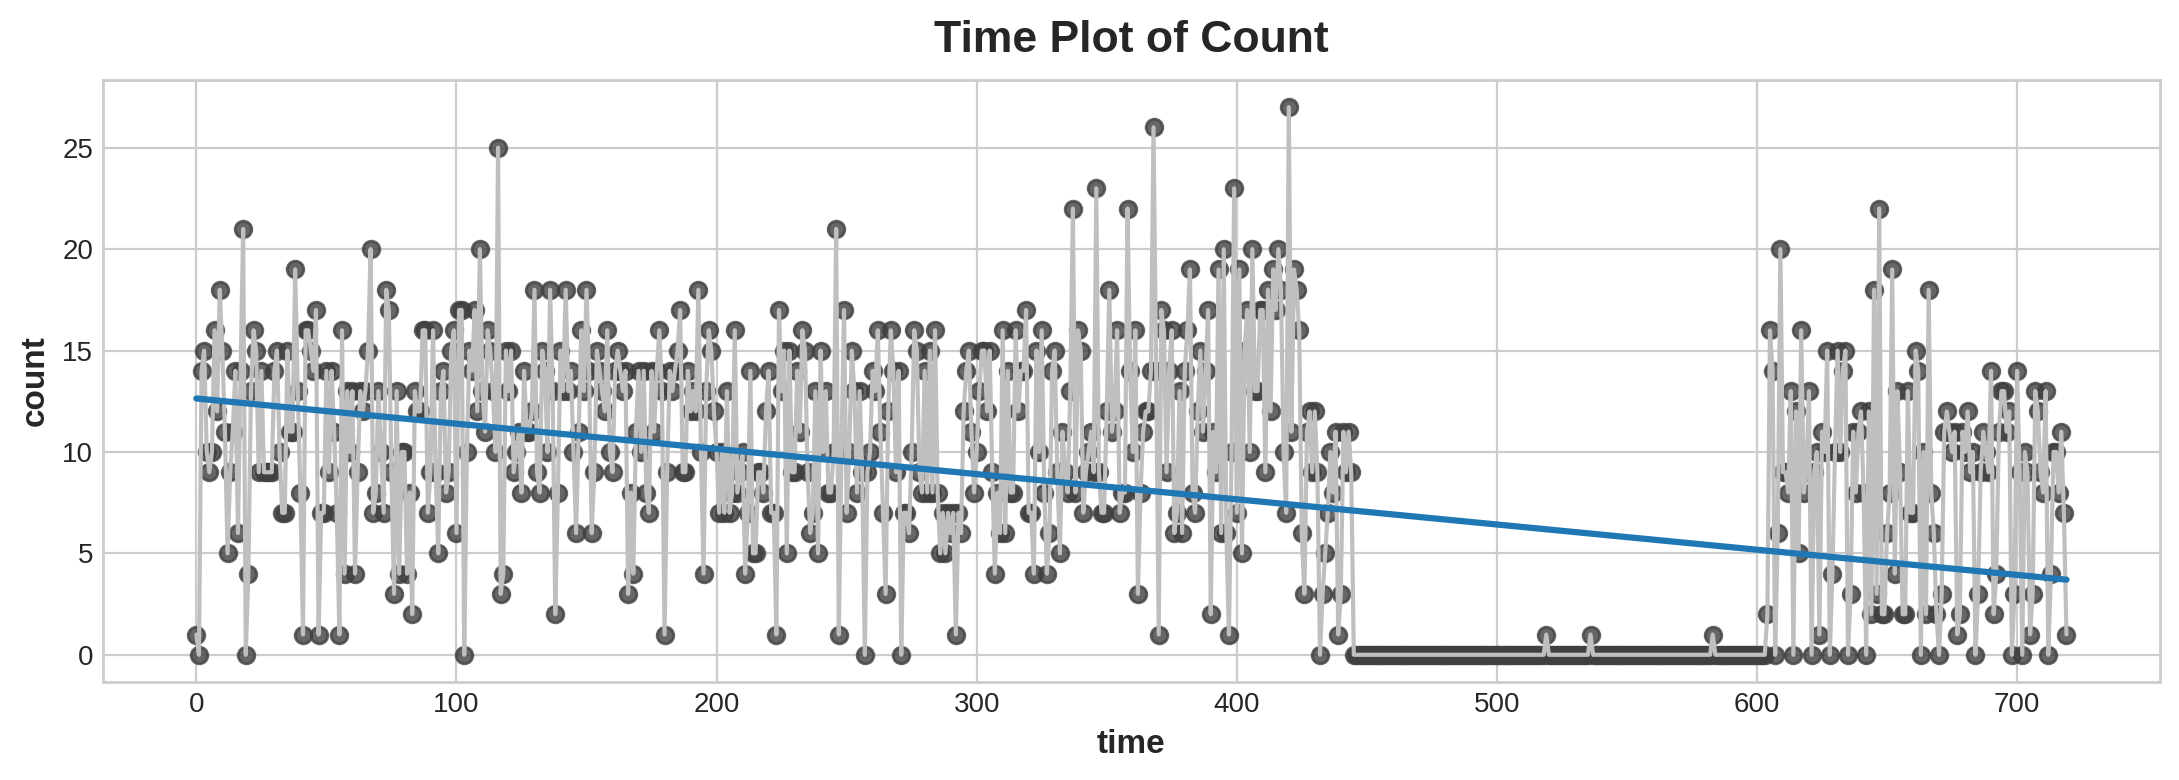

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('time', 'count', data=df, color='0.75')
ax = sns.regplot(x='time', y='count', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Count');

In [ ]:
df_lag1 = df.shift(1)
df_lag1.head()

,count,taxes,unemployment,economy,international_relations,border_issues,health_care,public_order,civil_liberties,environment,education,domestic_politics,poverty,disaster,religion,infrastructure,media_internet,time
date,,,,,,,,,,,,,,,,,,
11/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12/1/2021,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
13/1/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14/1/2021,14.0,4.0,1.0,4.0,4.0,4.0,3.0,12.0,12.0,10.0,5.0,8.0,1.0,4.0,3.0,1.0,3.0,2.0
15/1/2021,15.0,5.0,2.0,5.0,7.0,7.0,6.0,15.0,15.0,12.0,5.0,7.0,4.0,6.0,5.0,1.0,7.0,3.0


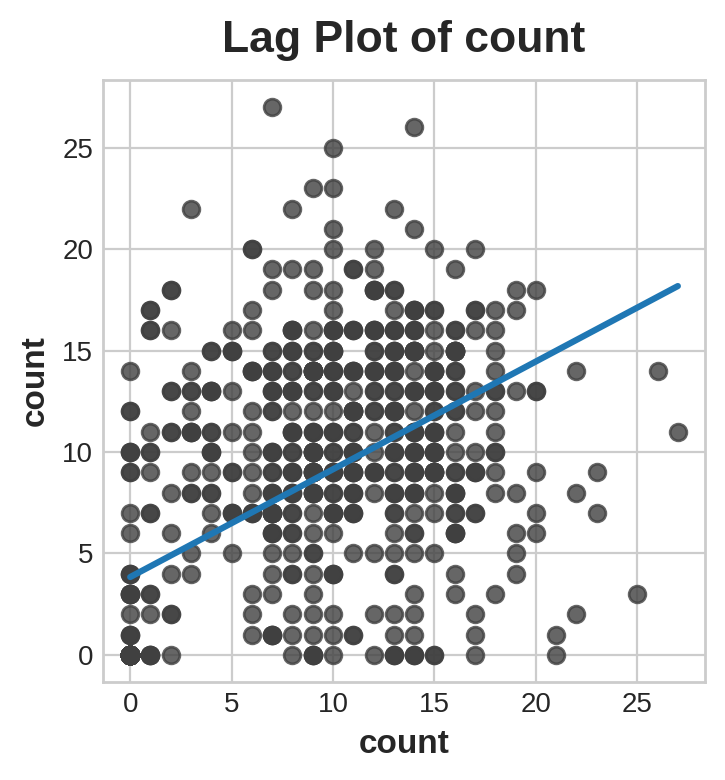

In [ ]:
fig, ax = plt.subplots()
ax = sns.regplot(x=df_lag1['count'], y=df['count'], ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of count');

In [ ]:
df_lag2 = df.shift(2)
df_lag2.head()

,count,taxes,unemployment,economy,international_relations,border_issues,health_care,public_order,civil_liberties,environment,education,domestic_politics,poverty,disaster,religion,infrastructure,media_internet,time
date,,,,,,,,,,,,,,,,,,
11/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13/1/2021,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
14/1/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15/1/2021,14.0,4.0,1.0,4.0,4.0,4.0,3.0,12.0,12.0,10.0,5.0,8.0,1.0,4.0,3.0,1.0,3.0,2.0


In [ ]:
df_lag3 = df.shift(3)
df_lag3.head()

,count,taxes,unemployment,economy,international_relations,border_issues,health_care,public_order,civil_liberties,environment,education,domestic_politics,poverty,disaster,religion,infrastructure,media_internet,time
date,,,,,,,,,,,,,,,,,,
11/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14/1/2021,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
15/1/2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_lag4 = df.shift(4)
df_lag4.head()

,count,taxes,unemployment,economy,international_relations,border_issues,health_care,public_order,civil_liberties,environment,education,domestic_politics,poverty,disaster,religion,infrastructure,media_internet,time
date,,,,,,,,,,,,,,,,,,
11/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15/1/2021,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
df_lag5 = df.shift(5)
df_lag5.head()

,count,taxes,unemployment,economy,international_relations,border_issues,health_care,public_order,civil_liberties,environment,education,domestic_politics,poverty,disaster,religion,infrastructure,media_internet,time
date,,,,,,,,,,,,,,,,,,
11/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15/1/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Linear Regression

In [ ]:
# Training data
X = df.loc[:, ['time']]  # features
y = df.loc[:, 'count']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R²) score: 0.1738406873507793
Mean Squared Error (MSE): 31.6985025119421


In [ ]:
X = df_lag1.loc[:, ['count']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R²) score: 0.2823130637814809
Mean Squared Error (MSE): 27.523498983613358


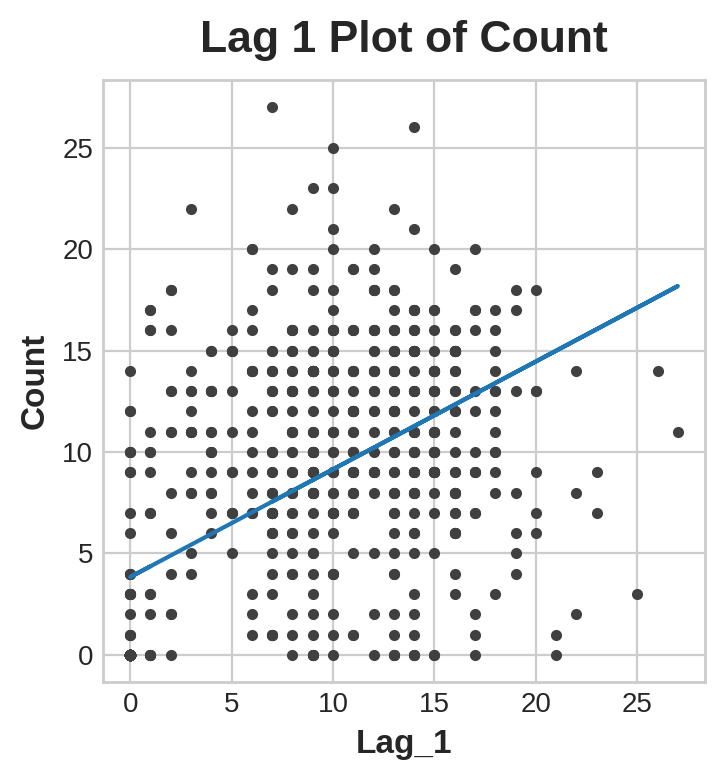

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['count'], y, '.', color='0.25')
ax.plot(X['count'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Count')
ax.set_xlabel('Lag_1')
ax.set_title('Lag 1 Plot of Count');

In [ ]:
X = df_lag2.loc[:, ['count']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R²) score: 0.22863143265979902
Mean Squared Error (MSE): 29.551429908843076


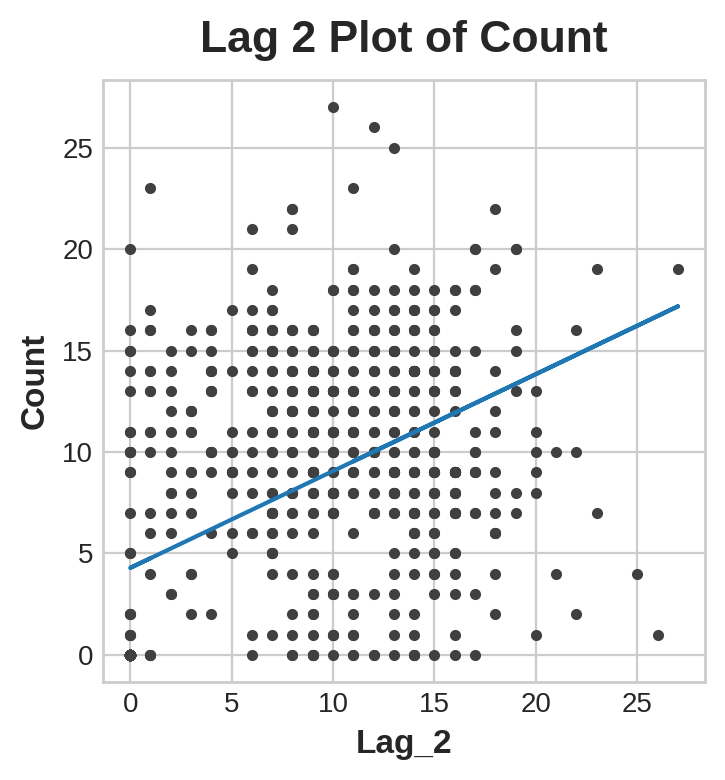

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['count'], y, '.', color='0.25')
ax.plot(X['count'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Count')
ax.set_xlabel('Lag_2')
ax.set_title('Lag 2 Plot of Count');

In [ ]:
X = df_lag3.loc[:, ['count']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R²) score: 0.24889009231711867
Mean Squared Error (MSE): 28.780044253427008


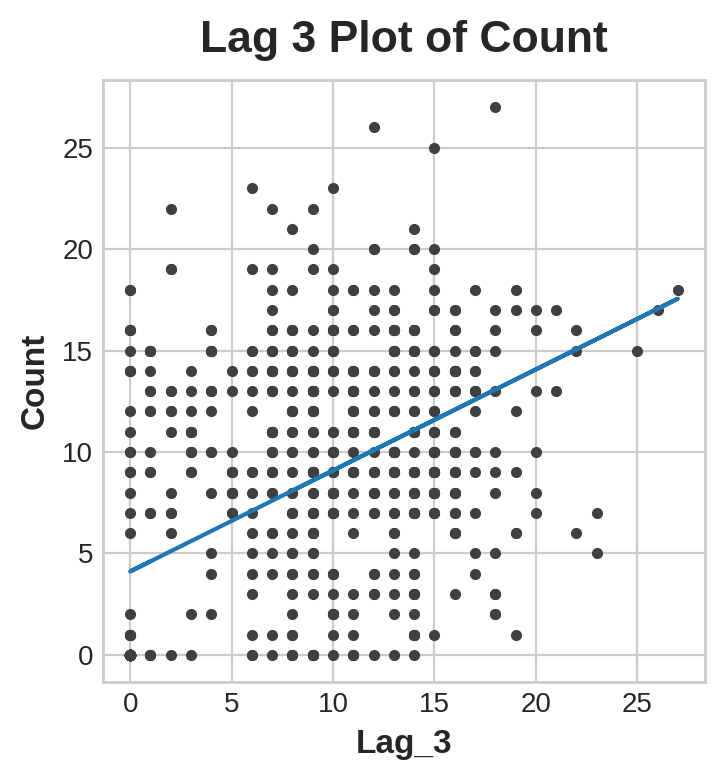

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['count'], y, '.', color='0.25')
ax.plot(X['count'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Count')
ax.set_xlabel('Lag_3')
ax.set_title('Lag 3 Plot of Count');

In [ ]:
dX = df_lag4.loc[:, ['count']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R²) score: 0.24889009231711867
Mean Squared Error (MSE): 28.780044253427008


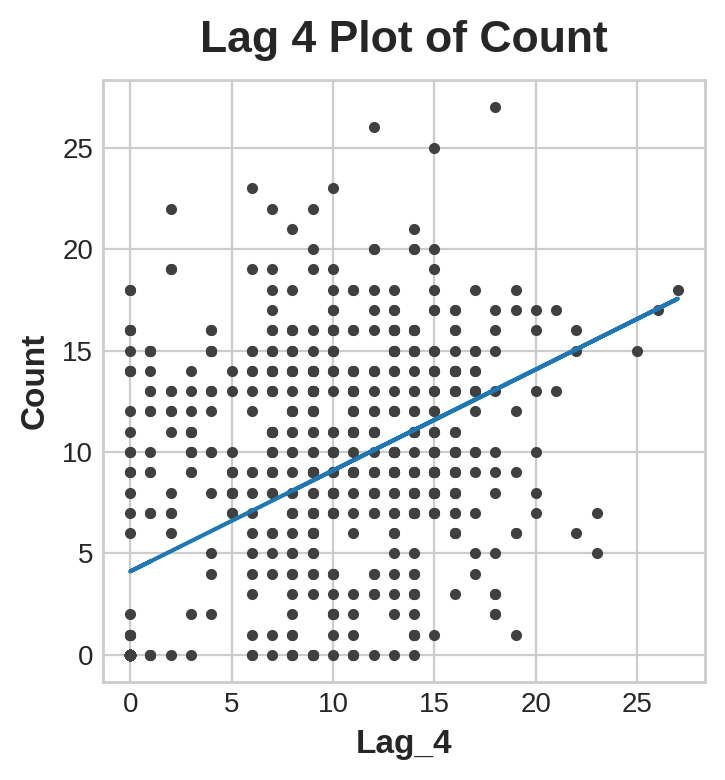

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['count'], y, '.', color='0.25')
ax.plot(X['count'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Count')
ax.set_xlabel('Lag_4')
ax.set_title('Lag 4 Plot of Count');

In [ ]:
X = df_lag5.loc[:, ['count']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R²) score: 0.20123298280928803
Mean Squared Error (MSE): 30.635991971950105


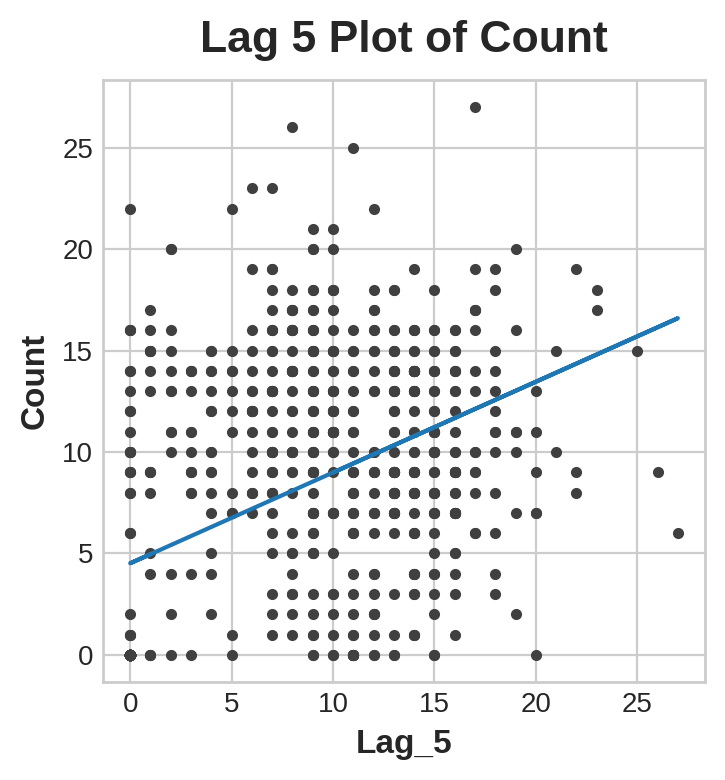

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['count'], y, '.', color='0.25')
ax.plot(X['count'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Count')
ax.set_xlabel('Lag_5')
ax.set_title('Lag 5 Plot of Count');

In [ ]:
X = df_lag1.drop(columns=['count', 'time'])
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R²) score: 0.299047622036292
Mean Squared Error (MSE): 26.881723894959283


In [ ]:
X = df_lag2.drop(columns=['count', 'time'])
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R²) score: 0.3045099243011937
Mean Squared Error (MSE): 26.644495374212934


In [ ]:
X = df_lag3.drop(columns=['count', 'time'])
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R²) score: 0.2931762697066155
Mean Squared Error (MSE): 27.083144595936464


In [ ]:
X = df_lag4.drop(columns=['count', 'time'])
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R²) score: 0.30065994153010034
Mean Squared Error (MSE): 26.78836270223374


In [ ]:
X = df_lag5.drop(columns=['count', 'time'])
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R²) score: 0.25052815108587023
Mean Squared Error (MSE): 28.74532003999084


# RNN - LSTM

In [ ]:
X = df_lag1.drop(columns=['count', 'time'])
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # Create the target
y, X = y.align(X, join='inner')  # Drop corresponding values in the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 16)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Flatten the predictions and true labels
y_pred = y_pred.flatten()
y_test = y_test.values.reshape(-1, 1)
y_test = y_test.flatten()

# Calculate the R-squared score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

5/5 [==============================] - 0s 4ms/step
R-squared (R²) score: 0.3879700657233829
Mean Squared Error (MSE): 21.086225768044162


In [ ]:
X = df_lag2.drop(columns=['count', 'time'])
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # Create the target
y, X = y.align(X, join='inner')  # Drop corresponding values in the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 16)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Flatten the predictions and true labels
y_pred = y_pred.flatten()
y_test = y_test.values.reshape(-1, 1)
y_test = y_test.flatten()

# Calculate the R-squared score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

5/5 [==============================] - 0s 3ms/step
R-squared (R²) score: 0.231507269886423
Mean Squared Error (MSE): 27.114125350301617


In [ ]:
X = df_lag3.drop(columns=['count', 'time'])
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # Create the target
y, X = y.align(X, join='inner')  # Drop corresponding values in the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 16)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Flatten the predictions and true labels
y_pred = y_pred.flatten()
y_test = y_test.values.reshape(-1, 1)
y_test = y_test.flatten()

# Calculate the R-squared score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

5/5 [==============================] - 0s 3ms/step
R-squared (R²) score: 0.22972102825135732
Mean Squared Error (MSE): 26.081164559051697


In [ ]:
X = df_lag4.drop(columns=['count', 'time'])
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # Create the target
y, X = y.align(X, join='inner')  # Drop corresponding values in the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 16)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Flatten the predictions and true labels
y_pred = y_pred.flatten()
y_test = y_test.values.reshape(-1, 1)
y_test = y_test.flatten()

# Calculate the R-squared score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

5/5 [==============================] - 0s 4ms/step
R-squared (R²) score: 0.27177016745144866
Mean Squared Error (MSE): 24.516193051423635


In [ ]:
X = df_lag5.drop(columns=['count', 'time'])
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # Create the target
y, X = y.align(X, join='inner')  # Drop corresponding values in the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 16)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Flatten the predictions and true labels
y_pred = y_pred.flatten()
y_test = y_test.values.reshape(-1, 1)
y_test = y_test.flatten()

# Calculate the R-squared score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

5/5 [==============================] - 0s 3ms/step
R-squared (R²) score: 0.32048541940666797
Mean Squared Error (MSE): 24.36183884437928


# RNN - GRU

In [ ]:
X = df_lag1.drop(columns=['count', 'time'])
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # Create the target
y, X = y.align(X, join='inner')  # Drop corresponding values in the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for GRU input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build a GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(1, 16)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Flatten the predictions and true labels
y_pred = y_pred.flatten()
y_test = y_test.values.reshape(-1, 1)
y_test = y_test.flatten()

# Calculate the R-squared score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

5/5 [==============================] - 0s 5ms/step
R-squared (R²) score: 0.3740644544850428
Mean Squared Error (MSE): 21.56531484783052


In [ ]:
X = df_lag2.drop(columns=['count', 'time'])
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # Create the target
y, X = y.align(X, join='inner')  # Drop corresponding values in the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for GRU input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build a GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(1, 16)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Flatten the predictions and true labels
y_pred = y_pred.flatten()
y_test = y_test.values.reshape(-1, 1)
y_test = y_test.flatten()

# Calculate the R-squared score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

5/5 [==============================] - 0s 3ms/step
R-squared (R²) score: 0.24153689759065
Mean Squared Error (MSE): 26.760257874224024


In [ ]:
X = df_lag3.drop(columns=['count', 'time'])
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # Create the target
y, X = y.align(X, join='inner')  # Drop corresponding values in the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for GRU input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build a GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(1, 16)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Flatten the predictions and true labels
y_pred = y_pred.flatten()
y_test = y_test.values.reshape(-1, 1)
y_test = y_test.flatten()

# Calculate the R-squared score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

5/5 [==============================] - 0s 3ms/step
R-squared (R²) score: 0.24296794672542843
Mean Squared Error (MSE): 25.632632178843696


In [ ]:
X = df_lag4.drop(columns=['count', 'time'])
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # Create the target
y, X = y.align(X, join='inner')  # Drop corresponding values in the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for GRU input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build a GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(1, 16)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Flatten the predictions and true labels
y_pred = y_pred.flatten()
y_test = y_test.values.reshape(-1, 1)
y_test = y_test.flatten()

# Calculate the R-squared score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

5/5 [==============================] - 0s 7ms/step
R-squared (R²) score: 0.3300738544529618
Mean Squared Error (MSE): 22.553372548538547


In [ ]:
X = df_lag5.drop(columns=['count', 'time'])
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'count']  # Create the target
y, X = y.align(X, join='inner')  # Drop corresponding values in the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for GRU input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build a GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(1, 16)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Flatten the predictions and true labels
y_pred = y_pred.flatten()
y_test = y_test.values.reshape(-1, 1)
y_test = y_test.flatten()

# Calculate the R-squared score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared (R²) score:", r2)
print("Mean Squared Error (MSE):", mse)

5/5 [==============================] - 0s 3ms/step
R-squared (R²) score: 0.3379786997934743
Mean Squared Error (MSE): 23.73467279111991
